# Pymaceuticals Inc.
---

### Analysis

- Of the four drug regimens analyzed for final tumor volume, Capolmulin and Ramicane far outpaced the other two treatments, Infubinol and Ceftamin. Both Capomulin and Ramicane had final tumor volumes below their mean tumor volumes (indicating a decrease) while Infubinol and Caftamin had higher tumor volumes than their mean volumes (indicating growth.

- This decrease in tumor volume can be seen when looking at a sample mouse (g288) from the Capomulin case study. Mouse G288 starts with a tumor that has a volume of 45mm3 and ends with a tumor volume of 37.07mm3. This significant decrease speaks to the potential efficacy of the grug treatment, but it must be noted that the final total volume is not the lowest volume for mouse G288, and it could indicate issues with the long-term efficacy of Capomulin as a sole treatment.

- There appears to be some correlation between the total volume of each tumor and the weight of the mouse, but not enough to find any causation between these two factors. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_study_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Checking the number of mice.
num_mice = len(mouse_study_df["Mouse ID"].unique())
num_mice

249

In [4]:
mouse_study_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [5]:
mouse_study_df = mouse_study_df[["Mouse ID", "Timepoint", 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites']]
mouse_study_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mouse_study_df.loc[mouse_study_df['Mouse ID'].isin(duplicate_mouse_id)]
duplicate_mouse_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
908,g989,0,Propriva,Female,21,26,45.000000,0
909,g989,0,Propriva,Female,21,26,45.000000,0
910,g989,5,Propriva,Female,21,26,48.786801,0
911,g989,5,Propriva,Female,21,26,47.570392,0
912,g989,10,Propriva,Female,21,26,51.745156,0
913,g989,10,Propriva,Female,21,26,49.880528,0
914,g989,15,Propriva,Female,21,26,51.325852,1
915,g989,15,Propriva,Female,21,26,53.442020,0
916,g989,20,Propriva,Female,21,26,55.326122,1
917,g989,20,Propriva,Female,21,26,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_df = mouse_study_df.drop(duplicate_mouse_df.index.values)
mouse_clean_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [9]:
mouse_clean_df["Mouse ID"].nunique()

248

In [10]:
# Checking the number of mice in the clean DataFrame. It should be mouse_study_df.count (1893)
# minus duplicate_mouse_df.count/2 (5) == 1883
mouse_clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Group by drug regimen
drug_regimens_df = mouse_clean_df.groupby(['Drug Regimen'])


In [12]:
#Calculate mean of tumor volume
tumor_volume_mean = drug_regimens_df['Tumor Volume (mm3)'].mean()
tumor_volume_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
tumor_volume_median = drug_regimens_df['Tumor Volume (mm3)'].median()
tumor_volume_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
tumor_volume_variance = drug_regimens_df['Tumor Volume (mm3)'].var()
tumor_volume_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
tumor_volume_st_dev = drug_regimens_df['Tumor Volume (mm3)'].std()
tumor_volume_st_dev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
tumor_volume_SEM = drug_regimens_df['Tumor Volume (mm3)'].sem()
tumor_volume_SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
regimen_summary_df = pd.DataFrame({'Mean Tumor Volume': tumor_volume_mean,
                                 'Median Tumor Volume': tumor_volume_median,
                                 'Tumor Volume Variance': tumor_volume_variance,
                                 'Tumor Volume Std. Dev.': tumor_volume_st_dev,
                                 'Tumor Volume Std. Err.': tumor_volume_SEM
                                  })
regimen_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Using the aggregation method, produce the same summary statistics in a single line.

drug_summary_b_df = mouse_clean_df.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
drug_summary_b_df 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

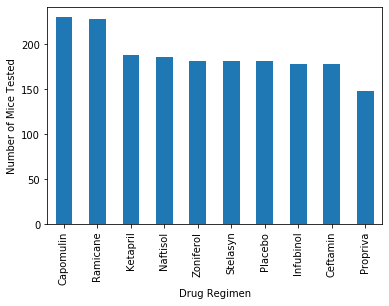

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_mice = drug_regimens_df['Mouse ID'].count()
total_mice = total_mice.sort_values(ascending=False)
tp_regimen_pdplot = total_mice.plot(kind='bar')
plt.ylabel('Number of Mice Tested')
plt.show()

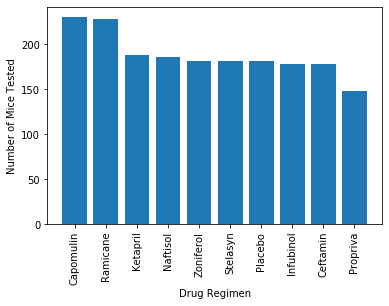

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(total_mice)) 
y_axis = drug_regimens_df['Mouse ID'].count().sort_values(ascending=False)
plt.bar(x_axis, y_axis, align='center')
tick_names = list(y_axis.index.values)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, tick_names, rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()



In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Group mouse_clean_df by gender and get count
mouse_gender = mouse_clean_df.groupby(['Sex']).count()
mouse_gender = mouse_gender["Mouse ID"].sort_values(ascending=False)
mouse_gender

Sex
Male      958
Female    922
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Sex')

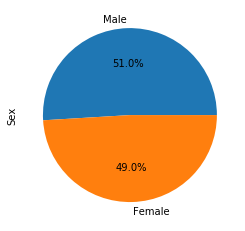

In [22]:
mg_pie = mouse_gender.plot(kind='pie', y='Mouse ID', autopct='%1.1f%%')
mg_pie.set_ylabel('Sex')


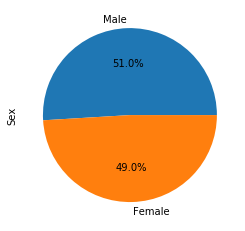

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = mouse_clean_df.groupby(['Sex']).count()
mouse_gender = mouse_gender["Mouse ID"].sort_values(ascending=False)
explode = (0,0)
labels = list(mouse_gender.index)

plt.pie(mouse_gender, explode=explode, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = mouse_clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_tp

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tv_df = pd.merge(mouse_clean_df, max_tp, on=(['Mouse ID', 'Timepoint']))
final_tv_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,45,Ramicane,Male,21,16,22.050126,1
1,s185,45,Capomulin,Female,3,17,23.343598,1
2,x401,45,Capomulin,Female,16,15,28.484033,0
3,m601,45,Capomulin,Male,22,17,28.430964,1
4,g791,45,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,5,Stelasyn,Female,21,28,45.934712,0
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_treatment = final_tv_df.loc[final_tv_df['Drug Regimen'] == treatment]
    tumor_volume = tumor_treatment['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    

In [26]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
first_quartile = tumor_vol_data[0].quantile([0.25,0.5,0.75])
lower1 = first_quartile[0.25]
upper1 = first_quartile[0.75]
IQR1 = upper1 - lower1

second_quartile = tumor_vol_data[1].quantile([0.25,0.5,0.75])
lower2 = second_quartile[0.25]
upper2 = second_quartile[0.75]
IQR2 = upper2 - lower2

third_quartile = tumor_vol_data[2].quantile([0.25,0.5,0.75])
lower3 = third_quartile[0.25]
upper3 = third_quartile[0.75]
IQR3 = upper3 - lower3

fourth_quartile = tumor_vol_data[3].quantile([0.25,0.5,0.75])
lower4 = fourth_quartile[0.25]
upper4 = fourth_quartile[0.75]
IQR4 = upper4 - lower4



In [27]:
# Determine outliers using upper and lower bounds
lower_bound1 = lower1 - (1.5 * IQR1)
upper_bound1 = upper1 + (1.5 * IQR1)

lower_bound2 = lower2 - (1.5 * IQR2)
upper_bound2 = upper2 + (1.5 * IQR2)

lower_bound3 = lower3 - (1.5 * IQR3)
upper_bound3 = upper3 + (1.5 * IQR3)

lower_bound4 = lower4 - (1.5 * IQR4)
upper_bound4 = upper4 + (1.5 * IQR4)



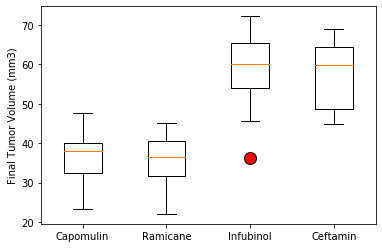

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,)

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, flierprops=flierprops, labels=treatments)
plt.show() 


## Line and Scatter Plots

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Find Mouse IDs of mice treated with Capomulin
capo_mouse = mouse_clean_df.loc[mouse_clean_df['Drug Regimen'] == "Capomulin"]
capo_mouse['Mouse ID'].value_counts()



v923    10
g288    10
y793    10
m601    10
s185    10
r944    10
s710    10
b742    10
i557    10
j119    10
b128    10
g316    10
m957    10
x401    10
u364    10
l897    10
t565    10
i738    10
w914    10
r554    10
l509    10
j246     8
f966     5
r157     4
w150     3
Name: Mouse ID, dtype: int64

In [30]:
#Gather data for mouse (g288 in this case)
mouse_g288 = mouse_clean_df.loc[mouse_clean_df['Mouse ID'] == 'g288']
mouse_g288

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
235,g288,0,Capomulin,Male,3,19,45.000000,0
236,g288,5,Capomulin,Male,3,19,45.839400,0
237,g288,10,Capomulin,Male,3,19,46.304003,1
238,g288,15,Capomulin,Male,3,19,42.172301,1
239,g288,20,Capomulin,Male,3,19,42.957120,1
240,g288,25,Capomulin,Male,3,19,42.368692,1
241,g288,30,Capomulin,Male,3,19,42.874461,1
242,g288,35,Capomulin,Male,3,19,38.954115,1
243,g288,40,Capomulin,Male,3,19,36.356851,1
244,g288,45,Capomulin,Male,3,19,37.074024,1


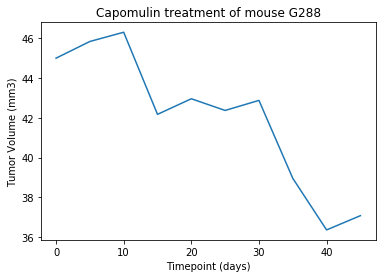

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Make axis variables
time_x_axis = mouse_g288['Timepoint']
vol_y_axis = mouse_g288['Tumor Volume (mm3)']

#Plot line and label
plt.plot(time_x_axis, vol_y_axis)
plt.title('Capomulin treatment of mouse G288')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Group mice by Capomulin regimen
capo_mice = capo_mouse.groupby(['Mouse ID']).mean()


In [33]:
#Get average weight and tumor volume of mice
capo_avg_weight = capo_mice['Weight (g)']
capo_avg_tvolume = capo_mice['Tumor Volume (mm3)']

## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Calculate correlation coefficient
correlation_coefficient = st.pearsonr(capo_avg_weight, capo_avg_tvolume)
print(correlation_coefficient)

#Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capo_avg_weight, capo_avg_tvolume)
regress_values = capo_avg_weight * slope + intercept 
print(regress_values)



(0.8419363424694717, 1.322572243471279e-07)
Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64


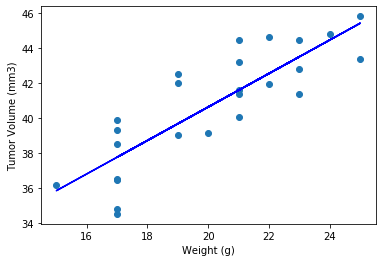

In [35]:
#Create scatterplot
plt.scatter(capo_avg_weight, capo_avg_tvolume)
plt.plot(capo_avg_weight, regress_values, 'b-')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()